In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [2]:
data = pd.read_csv('.../EEG_data.csv')
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [3]:
X = data.iloc[:,:13]
Y = data.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=14)


#Create Scaled X
scaler = StandardScaler()
scaler.fit(data.drop('user-definedlabeln',axis=1))
scaled_features = scaler.transform(data.drop('user-definedlabeln',axis=1))
data_scaled = pd.DataFrame(scaled_features,columns=data.columns[:-1])

data_scaled.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel
0,-1.566138,-1.507183,0.634334,-0.184623,0.355294,-0.476510,-0.317217,-0.105613,-0.157642,0.094523,0.087938,0.045544,-0.169923,-0.960727
1,-1.566138,-1.507183,-0.056750,-0.537745,-0.193295,-0.834378,-0.573352,-0.551518,-0.530654,-0.562100,-0.435821,-0.304417,-0.324028,-0.960727
2,-1.566138,-1.507183,0.245599,0.036078,0.059256,0.239285,0.883532,2.217577,0.496016,0.312017,1.168583,0.346396,0.303549,-0.960727
3,-1.566138,-1.507183,0.245599,0.433339,-0.118031,2.205862,-0.158536,0.274088,-0.276091,-0.334314,0.307573,0.255157,0.541603,-0.960727
4,-1.566138,-1.507183,0.116021,0.256779,-0.123049,0.626350,0.763033,-0.059126,0.955168,0.546890,0.777338,0.190389,0.425518,-0.960727


In [4]:

X_scaled = data_scaled.iloc[:,:]


X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=14)

In [5]:
data.head(5)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


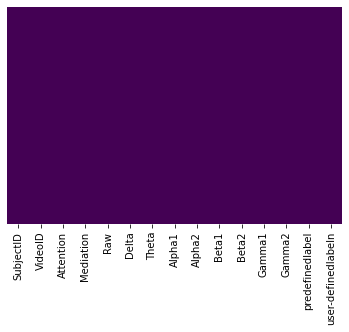

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

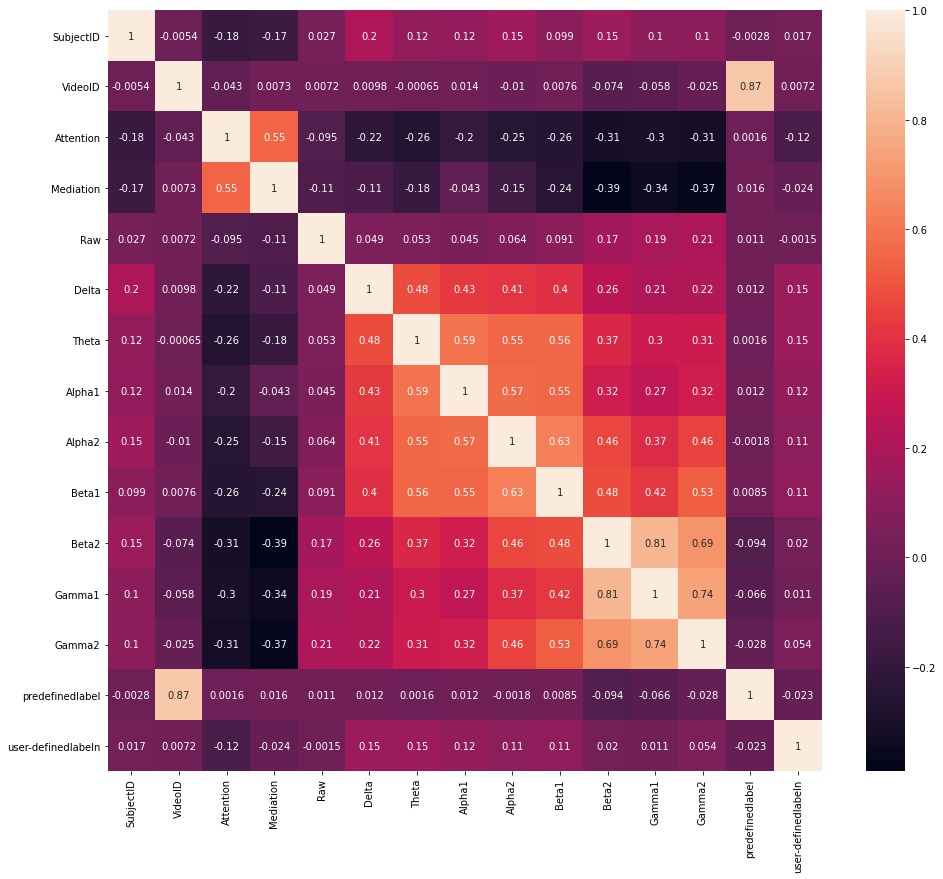

In [7]:
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),annot=True)

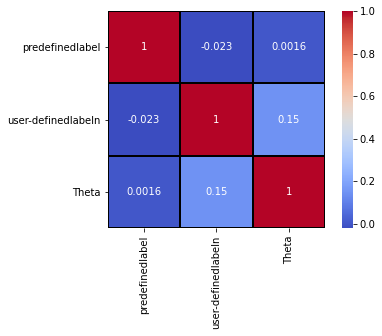

In [8]:
sns.heatmap(data[['predefinedlabel','user-definedlabeln', 'Theta']].corr(),cmap='coolwarm',
            annot=True,square=True,lw=1,linecolor='black')

In [9]:
error_rate = []

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,Y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != Y_test))

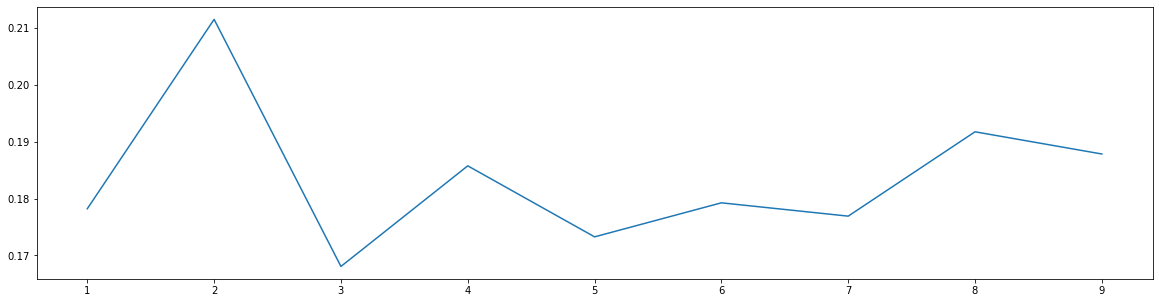

In [10]:
plt.figure(figsize=(20,5))
plt.plot(range(1,10), error_rate)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


C:\Anaconda3\envs\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


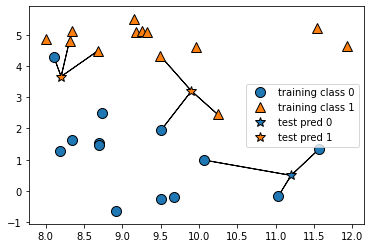

In [16]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [25]:
knn.fit(X_train_scaled,Y_train)

knn_predictions = knn.predict(X_test_scaled)

print("테스트 세트 예측: {}".format(knn_predictions))

print("테스트 세트 정확도: {:.2f}".format(knn.score(X_train_scaled,Y_train)))

테스트 세트 예측: [1. 1. 0. ... 0. 1. 1.]
테스트 세트 정확도: 0.92


In [26]:
print(classification_report(Y_test,knn_predictions))

confusion_matrix(Y_test, knn_predictions)

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      1867
         1.0       0.83      0.84      0.84      1977

    accuracy                           0.83      3844
   macro avg       0.83      0.83      0.83      3844
weighted avg       0.83      0.83      0.83      3844



array([[1537,  330],
       [ 316, 1661]], dtype=int64)

C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.

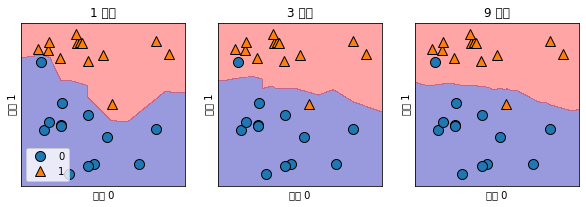

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환합니다.
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  fon

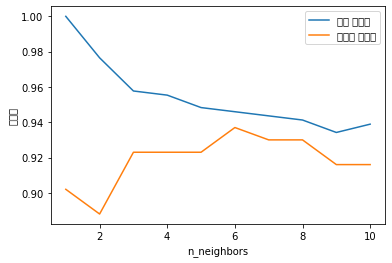

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
   cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

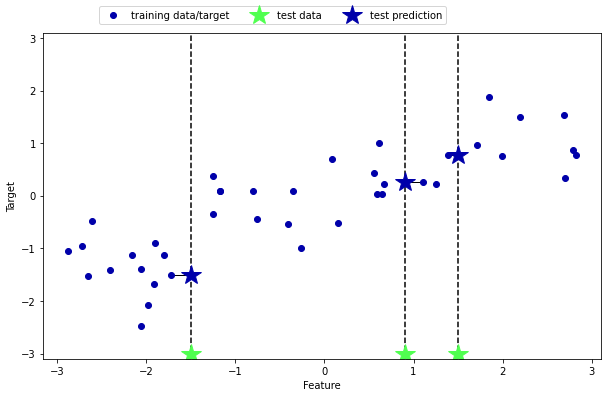

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

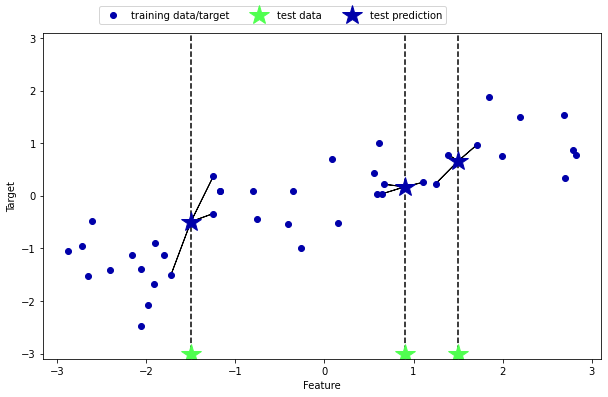

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [33]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [34]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  fon

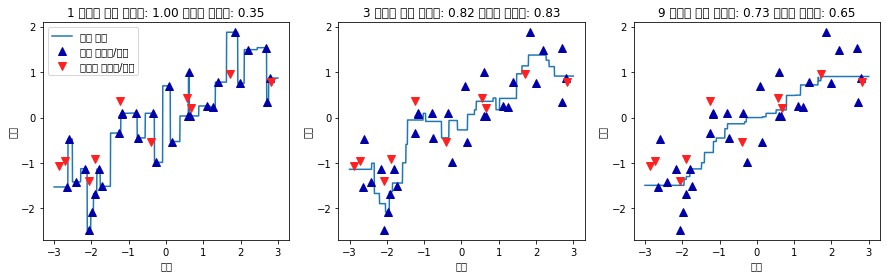

In [35]:
ig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], 
               loc="best")